In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string

In [3]:
file_path = "/Users/mohitrudrarajusuresh/ABSA-Sentiment-Project-1/ABSA-Sentiment-Project/data/raw/yelp_academic_dataset_review.json"

# Load data in chunks (useful for large files)
chunk_size = 100000  # Adjust based on your system's memory
df_list = []  # List to store chunks

for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
    df_list.append(chunk)  # Append each chunk to list

# Concatenate all chunks into a single DataFrame
df = pd.concat(df_list, ignore_index=True)

# Display the first few rows
print(df.head())


                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars  useful  funny  cool  \
0      3       0      0     0   
1      5       1      0     1   
2      3       0      0     0   
3      5       1      0     1   
4      4       1      0     1   

                                                text                date  
0  If you decide to eat here, just be aware it is... 2018-07-07 22:09:11  
1  I've taken a lot of spin classes over the year... 2012-01-03 15:28:18  
2  Family diner. Had the buffet. Eclectic assortm... 2014-02-05 20:30:30  
3  Wow!  Yummy, different,  delicious.

In [4]:
# Display basic info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


None

In [5]:
# Check for missing values
print(df.isnull().sum())

# Basic statistics of numerical & categorical columns
display(df.describe(include='all'))


review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
count,6990280,6990280,6990280,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06,6990280,6990280
unique,6990280,1987929,150346,NaN,NaN,NaN,NaN,6974127,NaN
top,KU_O5udG6zpxOg-VcAEodg,_BcWyKQL16ndpBdggh2kNA,_ab50qdWOk0DdB6XOrBitw,NaN,NaN,NaN,NaN,DO NOT PARK HERE!\nthey are too quick to boot ...,NaN
freq,1,3048,7673,NaN,NaN,NaN,NaN,18,NaN
mean,NaN,NaN,NaN,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01,NaN,2017-01-11 11:22:33.441780992
min,NaN,NaN,NaN,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,NaN,2005-02-16 03:23:22
25%,NaN,NaN,NaN,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2015-01-25 04:53:50.249999872
50%,NaN,NaN,NaN,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2017-06-03 01:26:07
75%,NaN,NaN,NaN,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,2019-05-23 00:02:46.249999872
max,NaN,NaN,NaN,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02,NaN,2022-01-19 19:48:45


/var/folders/4b/kpmm_w71555clc3mcb01ryt00000gn/T/ipykernel_81488/839107220.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['stars'], palette='viridis')


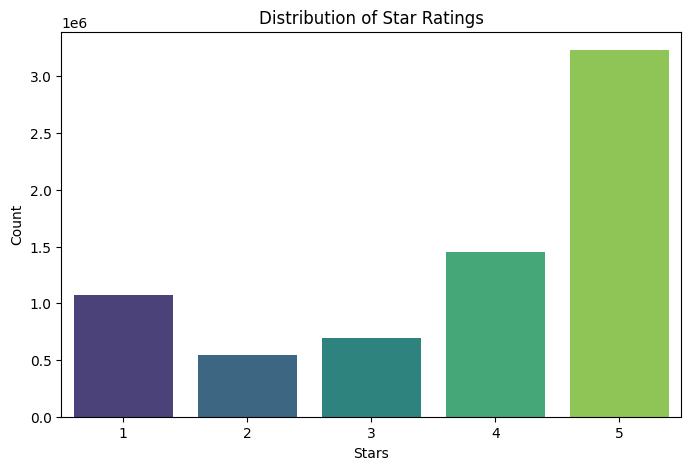

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['stars'], palette='viridis')
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()


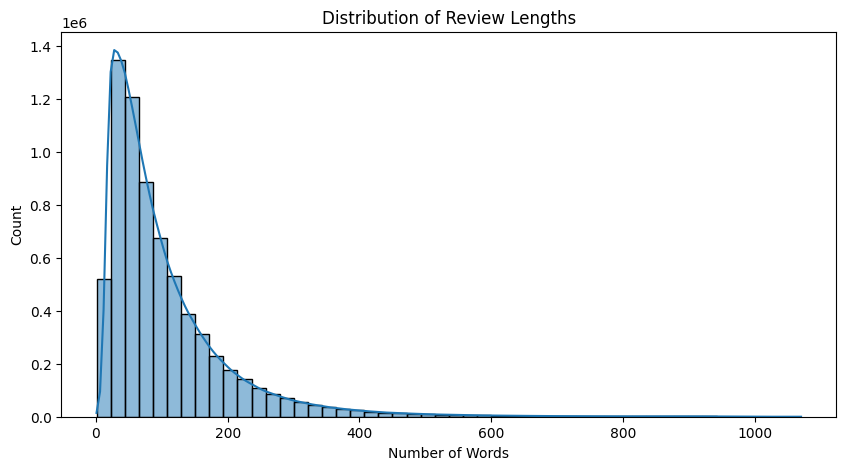

In [7]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()


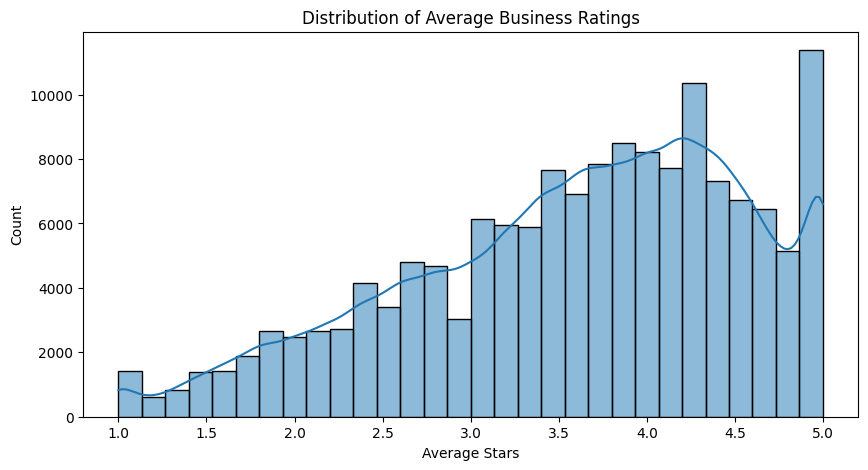

In [10]:
avg_stars_per_business = df.groupby('business_id')['stars'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.histplot(avg_stars_per_business['stars'], bins=30, kde=True)
plt.title('Distribution of Average Business Ratings')
plt.xlabel('Average Stars')
plt.ylabel('Count')
plt.show()


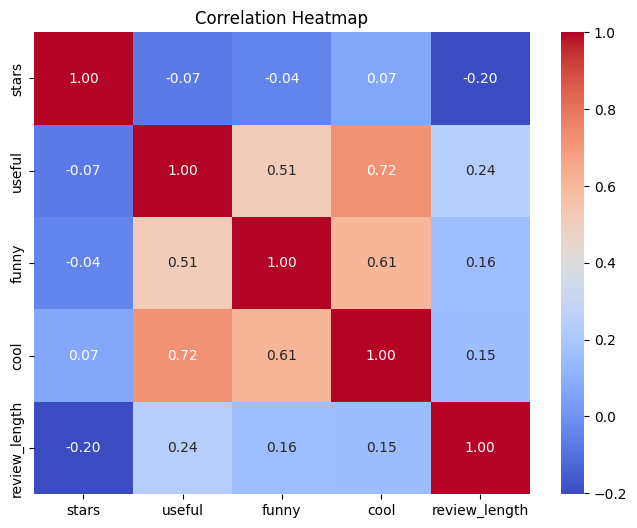

In [11]:
num_features = ['stars', 'useful', 'funny', 'cool', 'review_length']

plt.figure(figsize=(8, 6))
sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()
